In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Activation,Input,Dense
from keras.utils import np_utils

In [14]:
data = pd.read_csv('./titanic.csv')

data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
mean_age= int(data['Age'].mean())
data['Age']= data['Age'].fillna(mean_age)

sex_mapping = {
    'male':0,
    'female':1
}

sex=data['Sex'].values

quant_sex = np.zeros(sex.shape[0])

for ix in range(sex.shape[0]):
    quant_sex[ix]=sex_mapping[sex[ix]]

In [16]:
ds = np.asarray([data['Pclass'], quant_sex, data['Age'], data['SibSp'], data['Parch'],data['Fare'],data['Survived']]).astype('float').T

y = data['Survived'].values
cols = ['pclass', 'sex', 'Age', 'Sibsp', 'parch', 'fare', 'survived']
print cols
ds[2]

['pclass', 'sex', 'Age', 'Sibsp', 'parch', 'fare', 'survived']


array([  3.   ,   1.   ,  26.   ,   0.   ,   0.   ,   7.925,   1.   ])

In [17]:
split = int(ds.shape[0]*0.8)

x_train = ds[:split, :-1]
x_test = ds[split:, :-1]

y_train = np_utils.to_categorical(ds[:split, -1])
y_test = np_utils.to_categorical(ds[split: , -1])

print x_test.shape, x_train.shape
print y_test.shape, y_train.shape

(179, 6) (712, 6)
(179, 2) (712, 2)


In [28]:
model = Sequential()

model.add(Dense(18, input_shape=(6,)))
model.add(Activation('tanh'))

model.add(Dense(12))
model.add(Activation('tanh'))

model.add(Dense(6))
model.add(Activation('tanh'))


model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adagrad" , metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 18)                126       
_________________________________________________________________
activation_21 (Activation)   (None, 18)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 12)                228       
_________________________________________________________________
activation_22 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 78        
_________________________________________________________________
activation_23 (Activation)   (None, 6)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 14        
__________

In [29]:
hist = model.fit(x_train, y_train, epochs = 30, shuffle =True, validation_data=(x_test, y_test))

Train on 712 samples, validate on 179 samples
Epoch 1/30
712/712 [==============================] - 1s - loss: 0.6342 - acc: 0.6601 - val_loss: 0.6084 - val_acc: 0.6983
Epoch 2/30
712/712 [==============================] - 1s - loss: 0.6072 - acc: 0.6671 - val_loss: 0.5310 - val_acc: 0.7207
Epoch 3/30
712/712 [==============================] - 1s - loss: 0.5931 - acc: 0.6770 - val_loss: 0.5282 - val_acc: 0.7765
Epoch 4/30
712/712 [==============================] - 1s - loss: 0.5882 - acc: 0.6826 - val_loss: 0.5117 - val_acc: 0.7486
Epoch 5/30
712/712 [==============================] - 1s - loss: 0.5791 - acc: 0.6812 - val_loss: 0.5053 - val_acc: 0.7486
Epoch 6/30
712/712 [==============================] - 1s - loss: 0.5736 - acc: 0.6896 - val_loss: 0.5030 - val_acc: 0.7430
Epoch 7/30
712/712 [==============================] - 1s - loss: 0.5676 - acc: 0.6994 - val_loss: 0.5324 - val_acc: 0.7933
Epoch 8/30
712/712 [==============================] - 1s - loss: 0.5637 - acc: 0.7065 - val_l

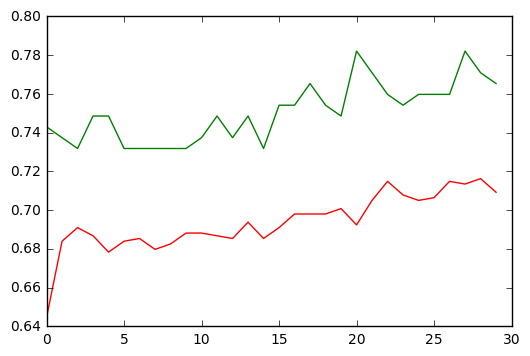

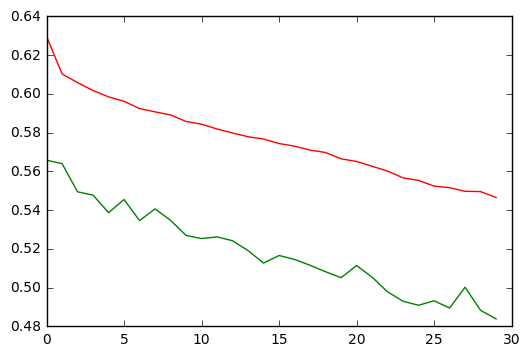

In [27]:
plt.figure(0)
plt.plot(hist.history['acc'], 'r')
plt.plot(hist.history['val_acc'], 'g')

plt.figure(1)
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'g')

plt.show()

In [48]:
(model.predict(x_test))

array([[ 0.64676827,  0.3532317 ],
       [ 0.89991778,  0.10008216],
       [ 0.83157498,  0.16842507],
       [ 0.90706307,  0.0929369 ],
       [ 0.35013828,  0.64986169],
       [ 0.30213013,  0.6978699 ],
       [ 0.91293716,  0.08706287],
       [ 0.89155054,  0.10844944],
       [ 0.25660145,  0.74339861],
       [ 0.91500527,  0.08499476],
       [ 0.87074125,  0.12925877],
       [ 0.83622718,  0.16377281],
       [ 0.41886172,  0.58113831],
       [ 0.90803665,  0.09196335],
       [ 0.34372261,  0.65627742],
       [ 0.50193179,  0.49806827],
       [ 0.75153917,  0.24846086],
       [ 0.47447133,  0.52552867],
       [ 0.35013428,  0.64986569],
       [ 0.64726341,  0.35273662],
       [ 0.87225026,  0.12774973],
       [ 0.86793441,  0.13206552],
       [ 0.86793441,  0.13206552],
       [ 0.91207826,  0.08792178],
       [ 0.31511906,  0.68488091],
       [ 0.30945051,  0.69054955],
       [ 0.89679223,  0.1032078 ],
       [ 0.89679223,  0.1032078 ],
       [ 0.73288333,

In [ ]:
i=0.0
for ix in range(x_test.shape[0]):
    if (np.argmax(model.predict(x_test)[ix]) == y_test[ix][1]):
        i= i+1
acc = i/x_test.shape[0]
print acc